
# Analyzing Ford GoBike System Data
Varsha Shukla </br>  
Oct-2019




## Table of Contents
 - Introduction
 - Part I - Gathering Data
 - Part II - Assessing Data
 - Part III - Cleaning Data
 - Part IV - Univariate Exploration
 - Part V - Bivariate Exploration
 - Part VI - Multivariate Exploration

### Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. 

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

### Preliminary Wrangling
This document explores the Ford GoBike's trip data for public containing approximately 1,850,000 bike rides from FY2018.


### Part I - Gathering Data

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

import glob
import os

%matplotlib inline

In [4]:
#load the dataset
df = pd.read_csv("/Users/vashukla/Downloads/201909-baywheels-tripdata.csv")

## Part II - Assessing Data

In [5]:
# Visually check first 5 records
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,1990.0,Female,No
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294,Pierce Ave at Market St,37.327581,-121.884559,443,3rd St at Keyes St,37.320866,-121.876279,163,Customer,NaN,NaN,No
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370,Jones St at Post St,37.787327,-122.413278,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,1985.0,Male,No
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109,17th St at Valencia St,37.763316,-122.421904,460,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,NaN,NaN,No
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95,Sanchez St at 15th St,37.766219,-122.431060,127,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,1989.0,Male,No


In [6]:
# Visually check 50 random records
df.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
158885,568,2019-09-10 08:02:42.3180,2019-09-10 08:12:10.9930,16,Steuart St at Market St,37.794130,-122.394430,81,Berry St at 4th St,37.775880,-122.393170,3473,Subscriber,1987.0,Male,No
32860,1142,2019-09-26 08:20:13.5040,2019-09-26 08:39:16.0760,267,Derby St at College Ave,37.861804,-122.253569,181,Grand Ave at Webster St,37.811377,-122.265192,9668,Customer,NaN,NaN,No
162083,541,2019-09-09 17:58:10.2570,2019-09-09 18:07:11.5530,453,Brannan St at 4th St,37.777934,-122.396973,104,4th St at 16th St,37.767045,-122.390833,9593,Customer,1986.0,Male,No
32787,1467,2019-09-26 08:18:59.7640,2019-09-26 08:43:27.6970,166,College Ave at Alcatraz Ave,37.851376,-122.252523,338,13th St at Franklin St,37.803189,-122.270579,12796,Subscriber,1979.0,Male,No
202048,186,2019-09-04 07:38:21.6230,2019-09-04 07:41:28.1680,419,Fern St at Polk St,37.788197,-122.420373,368,Myrtle St at Polk St,37.785434,-122.419622,10024,Customer,NaN,NaN,No
88732,1021,2019-09-19 08:19:46.7570,2019-09-19 08:36:48.7010,459,Utah St at 24th St,37.753123,-122.405393,50,2nd St at Townsend St,37.780526,-122.390288,9589,Subscriber,1987.0,Male,No
147033,329,2019-09-11 13:04:09.1610,2019-09-11 13:09:39.1250,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,10275,Subscriber,1994.0,Male,No
121241,768,2019-09-14 16:43:20.9270,2019-09-14 16:56:09.8490,376,Illinois St at 20th St,37.760458,-122.387540,81,Berry St at 4th St,37.775880,-122.393170,10382,Customer,1988.0,Male,No
140574,305,2019-09-12 08:26:45.4490,2019-09-12 08:31:51.1460,223,16th St Mission BART Station 2,37.764765,-122.420091,100,Bryant St at 15th St,37.767100,-122.410662,508,Subscriber,1987.0,Male,No
165407,1841,2019-09-09 09:46:59.2310,2019-09-09 10:17:40.6680,251,California St at University Ave,37.870555,-122.279720,257,Fifth St at Delaware St,37.870407,-122.299676,1774,Subscriber,1992.0,Female,Yes


In [7]:
# Check if duplicates exist
df.duplicated().sum()

0

In [8]:
# View descriptive statistics of the dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,217986.000000,217986.000000,217986.000000,217986.000000,217986.000000,217986.000000,217986.000000,217986.000000,170999.000000
mean,844.360340,155.828108,37.766839,-122.351045,150.034410,37.767041,-122.350124,7219.087955,1985.085053
std,1929.005266,128.100878,0.105999,0.123472,126.852447,0.105875,0.122580,4429.469296,10.155251
min,61.000000,3.000000,37.311284,-122.465007,3.000000,37.311284,-122.465007,12.000000,1890.000000
25%,381.000000,50.000000,37.769218,-122.413278,42.000000,37.770030,-122.411403,2381.000000,1980.000000
50%,602.000000,114.000000,37.780526,-122.398279,108.000000,37.780526,-122.397437,9758.000000,1988.000000
75%,932.000000,250.000000,37.796389,-122.290230,245.000000,37.797280,-122.291376,10609.000000,1992.000000
max,86114.000000,470.000000,37.880222,-121.870099,470.000000,37.880222,-121.870099,13007.000000,2001.000000


Quality issues

- start time and end time are objects not a timestamps
- user type, gender and bike_share_for_all_trip can be set to category
- bike id, start_station_id, end_station_id can be set to object
- member birth year has dates prior to 1900
- we can calculate the age of the user
- we can further enhance the dataset with more details about the time like month, day, hour, weekday
- we can calculate the distance for rides between stations

### Part III - Cleaning Data

In [9]:
# Create copies of original DataFrames
df_clean = df.copy()

__Define__ <br/>
Set appropriate data types for fields mentioned in the `Quality issues`

__Code__

In [10]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [11]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [12]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

__Test__

In [13]:

df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217986 entries, 0 to 217985
Data columns (total 16 columns):
duration_sec               217986 non-null int64
start_time                 217986 non-null datetime64[ns]
end_time                   217986 non-null datetime64[ns]
start_station_id           217986 non-null object
start_station_name         217986 non-null object
start_station_latitude     217986 non-null float64
start_station_longitude    217986 non-null float64
end_station_id             217986 non-null object
end_station_name           217986 non-null object
end_station_latitude       217986 non-null float64
end_station_longitude      217986 non-null float64
bike_id                    217986 non-null object
user_type                  217986 non-null category
member_birth_year          170999 non-null float64
member_gender              170999 non-null category
bike_share_for_all_trip    217986 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), o

__Define__ 
Calculate the age of the member

__Code__

In [14]:
# substract the birth year from the current year
df_clean['member_age'] = 2019-df_clean['member_birth_year']

__Test__

In [15]:
df_clean.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,60863,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,12904,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,1990.0,Female,No,29.0
1,36019,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,163,Pierce Ave at Market St,37.327581,-121.884559,163,3rd St at Keyes St,37.320866,-121.876279,163,Customer,NaN,NaN,No,NaN
2,5615,2019-09-30 23:12:25.998,2019-10-01 00:46:01.959,10737,Jones St at Post St,37.787327,-122.413278,10737,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,1985.0,Male,No,34.0
3,1482,2019-09-30 23:57:34.663,2019-10-01 00:22:16.849,10346,17th St at Valencia St,37.763316,-122.421904,10346,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,NaN,NaN,No,NaN
4,1272,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,1349,Sanchez St at 15th St,37.766219,-122.431060,1349,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,1989.0,Male,No,30.0
5,8648,2019-09-30 21:43:51.014,2019-10-01 00:07:59.893,9806,Davis St at Jackson St,37.797280,-122.398436,9806,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,9806,Customer,NaN,NaN,No,NaN
6,644,2019-09-30 23:54:43.104,2019-10-01 00:05:27.656,9963,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,9963,Berry St at King St,37.771762,-122.398438,9963,Subscriber,1981.0,Male,No,38.0
7,459,2019-09-30 23:54:42.865,2019-10-01 00:02:22.363,531,5th St at Folsom,37.780146,-122.403071,531,11th St at Natoma St,37.773507,-122.416040,531,Subscriber,1994.0,Male,No,25.0
8,625,2019-09-30 23:49:31.705,2019-09-30 23:59:56.916,10906,Steuart St at Market St,37.794130,-122.394430,10906,Townsend St at 5th St,37.775235,-122.397437,10906,Subscriber,1985.0,Male,No,34.0
9,1177,2019-09-30 23:39:34.088,2019-09-30 23:59:11.209,11058,Gennessee St at Monterey Blvd,37.731657,-122.451122,11058,Garfield Square (25th St at Harrison St),37.751017,-122.411901,11058,Customer,NaN,NaN,No,NaN


__Define__<br/> 
Enhance dataset with new date related fields

__Code__

In [16]:
# extract start time month name
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')


In [17]:


# extract start time month number
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)

In [18]:
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [19]:
# extract start time day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

In [20]:
# extract start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

__Test__

In [21]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour
0,60863,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,12904,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,San Francisco Caltrain Station (King St at 4th...,37.776329,...,Customer,1990.0,Female,No,29.0,September,9,Mon,30,11
1,36019,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,163,Pierce Ave at Market St,37.327581,-121.884559,163,3rd St at Keyes St,37.320866,...,Customer,NaN,NaN,No,NaN,September,9,Mon,30,16
2,5615,2019-09-30 23:12:25.998,2019-10-01 00:46:01.959,10737,Jones St at Post St,37.787327,-122.413278,10737,Cyril Magnin St at Ellis St,37.785881,...,Customer,1985.0,Male,No,34.0,September,9,Mon,30,23
3,1482,2019-09-30 23:57:34.663,2019-10-01 00:22:16.849,10346,17th St at Valencia St,37.763316,-122.421904,10346,Terry Francois Blvd at Warriors Way,37.769095,...,Customer,NaN,NaN,No,NaN,September,9,Mon,30,23
4,1272,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,1349,Sanchez St at 15th St,37.766219,-122.431060,1349,Valencia St at 21st St,37.756708,...,Subscriber,1989.0,Male,No,30.0,September,9,Mon,30,23


In [22]:
df_clean.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217986 entries, 0 to 217985
Data columns (total 22 columns):
duration_sec               217986 non-null int64
start_time                 217986 non-null datetime64[ns]
end_time                   217986 non-null datetime64[ns]
start_station_id           217986 non-null object
start_station_name         217986 non-null object
start_station_latitude     217986 non-null float64
start_station_longitude    217986 non-null float64
end_station_id             217986 non-null object
end_station_name           217986 non-null object
end_station_latitude       217986 non-null float64
end_station_longitude      217986 non-null float64
bike_id                    217986 non-null object
user_type                  217986 non-null category
member_birth_year          170999 non-null float64
member_gender              170999 non-null category
bike_share_for_all_trip    217986 non-null category
member_age                 170999 non-null float64
start_time_m

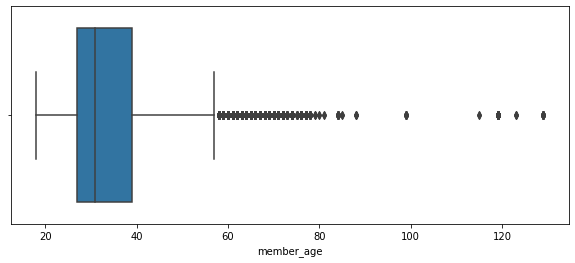

In [23]:
# code for the age boxplot

plt.figure(figsize = [10, 4])
base_color = sb.color_palette()[0]

sb.boxplot(data=df_clean, x='member_age', color=base_color);

In [24]:
df_clean.member_age.mean()

33.91494687103433

In [25]:
df_clean.member_age.describe(percentiles = [ .95])

count    170999.000000
mean         33.914947
std          10.155251
min          18.000000
50%          31.000000
95%          55.000000
max         129.000000
Name: member_age, dtype: float64

__Define__ <br/>
Remove age outliers. As mentioned in the Quality issues, there are customers with the birth year before 1900 thus customers with age above 100 years. As 95% of the users are below 58 , I am going to keep users below 60.

__Code__

In [51]:

# Keep records below 60, it automatically removes null values
df_clean = df_clean.query('member_age <=60')

In [52]:
# change age and birth year to integer
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

__Test__

In [53]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age,start_time_month,start_time_day,start_time_hour
count,167739.000000,167739.000000,167739.000000,167739.000000,167739.000000,167739.000000,167739.000000,167739.0,167739.000000,167739.000000
mean,711.944837,37.764537,-122.346274,37.764673,-122.345220,1985.708637,33.291363,9.0,15.815189,13.439379
std,1408.018198,0.111452,0.128507,0.111283,0.127498,9.117366,9.117366,0.0,8.310044,4.876341
min,61.000000,37.311284,-122.465007,37.311284,-122.465007,1959.000000,18.000000,9.0,1.000000,0.000000
25%,357.000000,37.769218,-122.411901,37.769305,-122.409851,1981.000000,26.000000,9.0,9.000000,9.000000
50%,559.000000,37.780146,-122.397437,37.780526,-122.395526,1988.000000,31.000000,9.0,16.000000,14.000000
75%,849.000000,37.796471,-122.280192,37.796389,-122.283127,1993.000000,38.000000,9.0,23.000000,17.000000
max,85035.000000,37.880222,-121.870099,37.880222,-121.870099,2001.000000,60.000000,9.0,30.000000,23.000000


In [2]:
df_clean.info(verbose=True, null_counts=True)
df_clean.to_csv('/Users/vashukla/Downloads/master_clean_file.csv')

NameError: name 'df_clean' is not defined

In [55]:
# save cleaned data 
df_clean.to_csv('clean_master_file.csv', index=False)

### What is the structure of your dataset?

The dataset contained features about:

- trip duration: start/end time, how long the trip took in seconds
- stations: start/end station, name, geolocation (latitude/longitude)
- anonymized customer data: gender, birth date and user type
- rented bikes: bike id
- The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:

- rental time: month, day, hour of the day, weekday (both for start and end date)
- customer: age


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out when and where bikes are high in demand (during the day/weekday/month). Moreover which age range and gender uses the service the most and if the service is mostly used by members or casual riders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the start time will be most exploited in my analysis as well as customer related data. I expect that location and datetime will have the strongest effect on bike demand.

## Part IV - Univariate Exploration

I'll start by looking at the monthly trend of number of bike rentals and distribution of weekdays and hours of the day. I will also explore the duration of the trips.

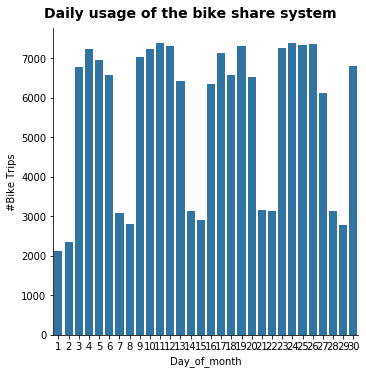

In [61]:
# monthly usege of the bike sharing system
g = sb.catplot(data=df_clean, x='start_time_day', kind='count', color = base_color)
g.set_axis_labels("Day_of_month", "#Bike Trips")
g.fig.suptitle('Daily usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

Bike Renting is high in demand during weekdays and less in weekends

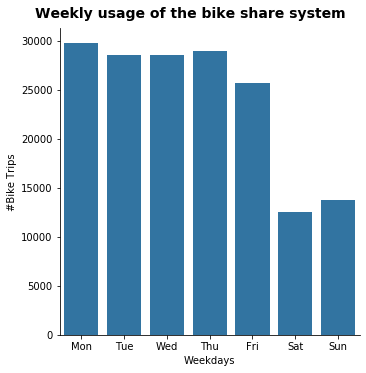

In [62]:
# weekday usege of the bike sharing system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)
g.set_axis_labels("Weekdays", "#Bike Trips")
g.fig.suptitle('Weekly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

The bike share system is mainly used during weekdays, with Tuesday - Thursday as the most popular days for bike rides. The system is most probably used as a daily work/school commute.

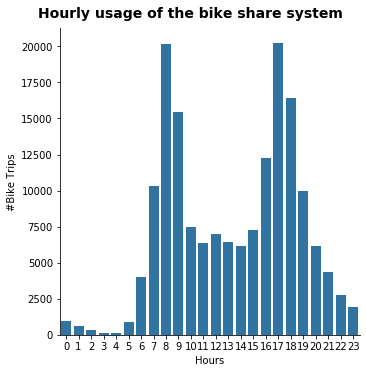

In [63]:
# hourly usege of the bike sharing system

g = sns.catplot(data=df_clean, x='start_time_hour', kind='count', color = base_color)
g.set_axis_labels("Hours", "#Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

The hourly distribution is bimodal, the system is used mainly around 8-9am and 5-6pm when people get to and gat back from work.

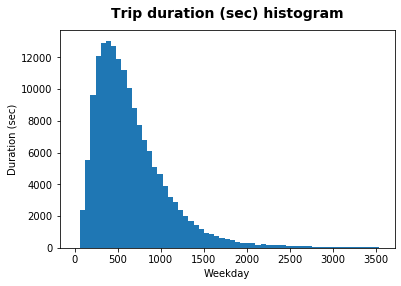

In [64]:
# code for the (histogram) duration (sec) distribution per user type

bin_edges = np.arange(0, 3600,60)

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges)

plt.title("Trip duration (sec) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)');


Looking at the histogram, we can see that trip durations are no longer than 30 min (1800 sec) and usually last 6 to 15 min.<br/> This can be explained by two facts:

1. The way the system works: single trips and 24h or 72h access pass are free of additional charge for trips up to 30 min, otherwise you pay extra $3 for additional 15 min. Only the monthly pass offers free of charge 45 min rides.
2. The way the system is used: as is looks like people use the system for commuting, they trips are usually short in time probably due to the closeness of their homes to workplace/school.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was one unusal points for the duration (sec), which in some cases lasted more than 24h. For the histogram I set the max range to 3600 sec = 60 min.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was one unusal distribution for the member birth year, which in some cases was dated before 1900. Since 95% of the members are between 17 and 57 years, I removed users older than 60.

## Part V - Bivariate Exploration


In this section I will further explore the dataset by adding the customer type to the analysis.

In [65]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

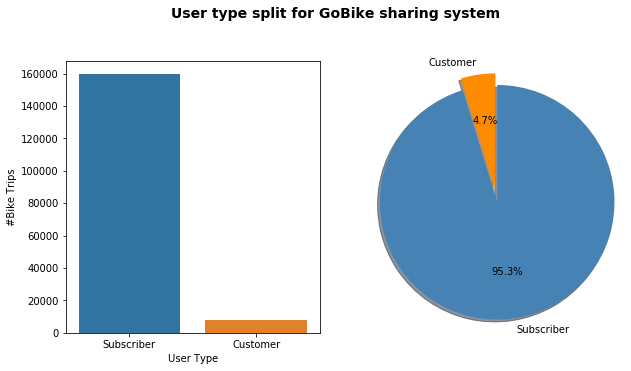

In [66]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

The bike sharing system is mainly used by subscribers (88%) than ocassional riders (12%). 

Next I am going to explore the renting trends per each user type.

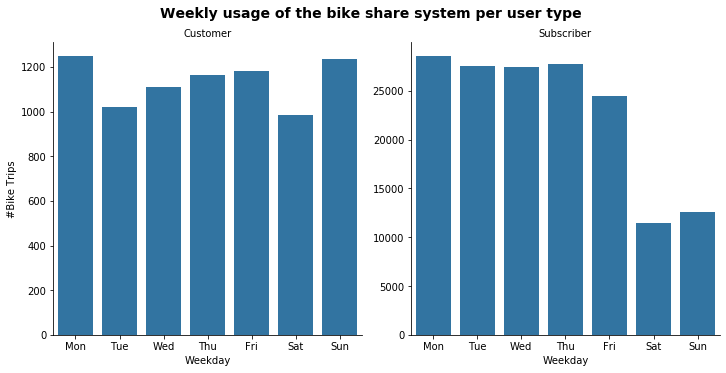

In [68]:
# weekday usege of the bike sharing system per user type

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = base_color, order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

There is a different trend on which days customers and subscribers rent bikes. As mentioned above customers are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, subscribers are most probably daily work/school commuters who use the system within a week. 

Next, I am going to check when within a day bikes are high in demand.

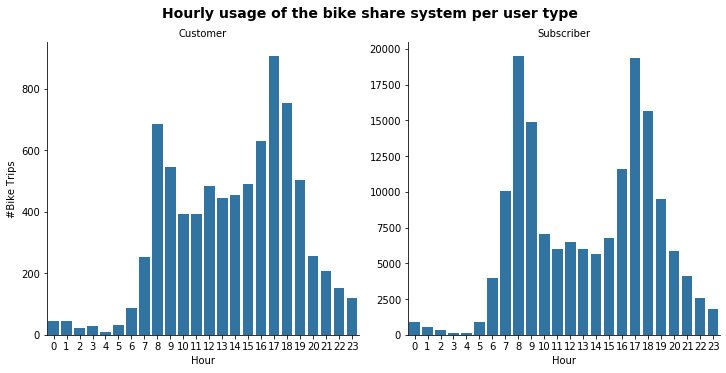

In [69]:
# hourly usege of the bike sharing system per user type

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

There is also a different trend of when during the day bikes are rented most often. Customers use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm. Subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work. 

Next, I am going to check how the trip duration varies between customers and subscribers.

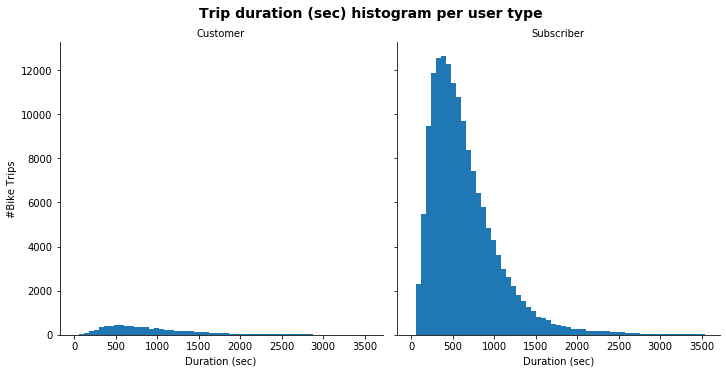

In [71]:
# code for the (histogram) duration (sec) distribution per user type

g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, height=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

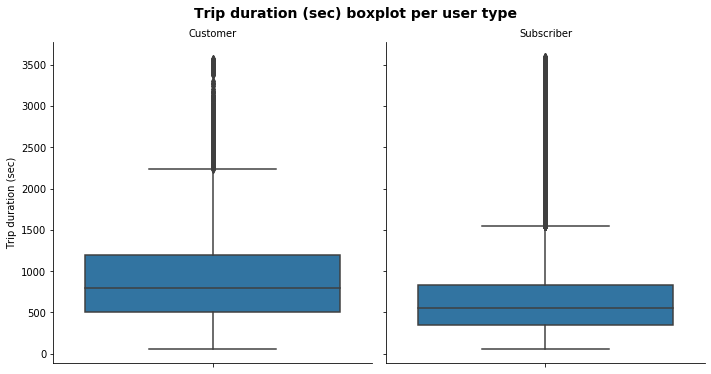

In [72]:
# code for the (boxplot) duration (sec) distribution per user type

data = df_clean.query('duration_sec < 3600')
g = sns.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

Looking at both charts (histograms and box plots), we can see that trip durations are longer for customers (9 to 23 minutes) than for subscribers (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis depicted different usage behaviours between customers and subscribers. As mentioned above customers are casual riders, most probably tourists who rent bikes mainly in summertime (the peak in July), more often during weekends than weekdays and they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm). Subscribers are daily commuters, who also use the system around summertime, May-October (with the peak in October). They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

## Part VI - Multivariate Exploration

In this section I will further explore the dataset by adding gender to the customer type and check the hourly distribution of bike rides during weekdays for customers and subscribers.

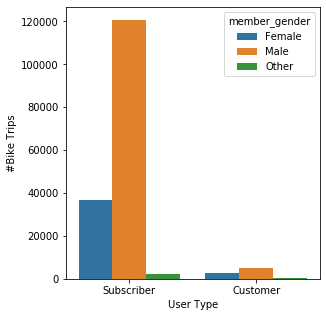

In [73]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');

In general, males are using the system more often than females and others (the registration system allows you to choose 'Other' as a gender). However, the ratio is much smaller between males and females for customers (more ore less 2:1) than for subscribers (3:1).

Let's explore if gender affects the way the bike system is used within a year, weekdays and hours of the day.

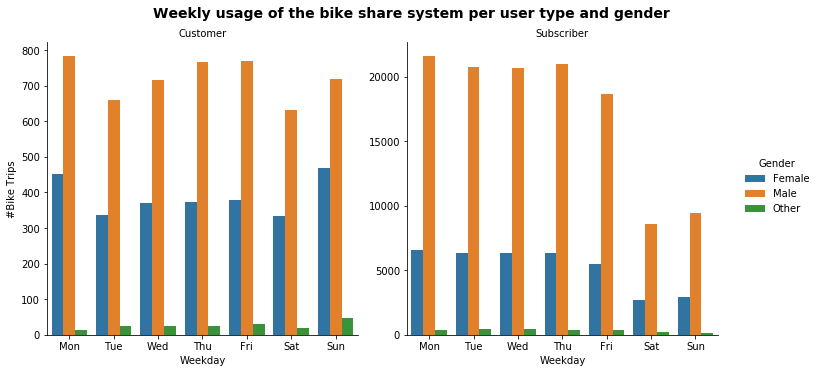

In [74]:
# weekday usege of the bike sharing system per user type and gender

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

As in the previous section, the trend is very similar for males and females: customers use the system more often during weekends than within a week (although the jump in bike used on weekends is much higher for females than for males); subscribers use the system mainly within a week.

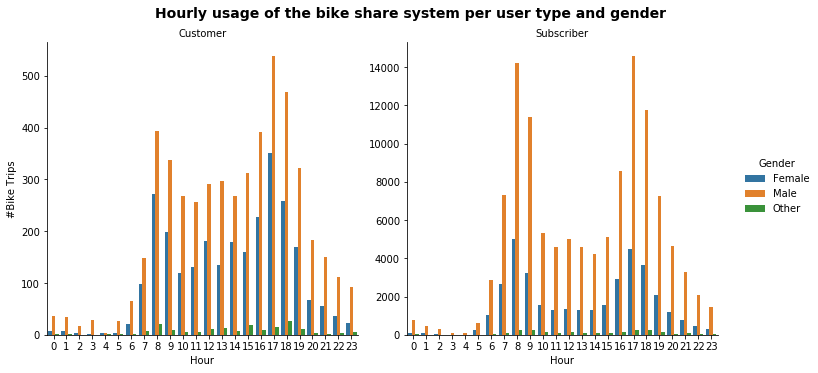

In [75]:
# hourly usege of the bike sharing system per user type and gender

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

During the day, both males and females use the system the same way: customers use bikes mainly between 8 am - 7 pm; subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.

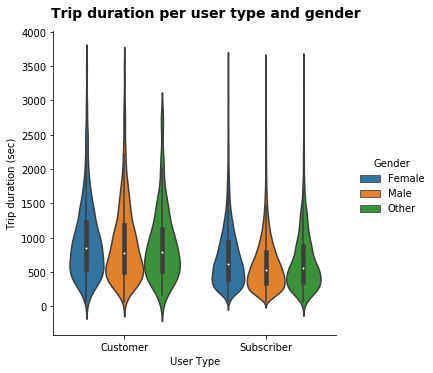

In [76]:
# code for the (violinplot) duration (sec) distribution per user type and gender

g = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');


Here we can observe that in both cases, females take longer trips (measured in time) than males and other. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small).



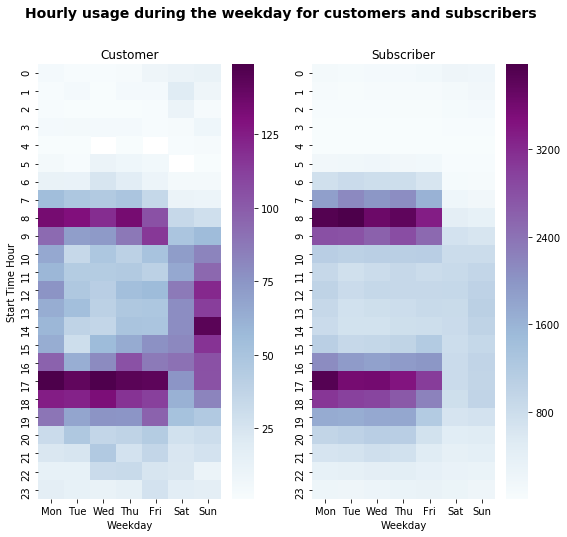

In [77]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

The plot perfectly summarizes in one place the diffrent trends for customers and subscribers I was writing up before. 

   __Customers use the bike sharing system more often on weekends:__<br/>
- weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm
- weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm  <br/>
__Subscribers use the bike sharing system mainly on weekdays:__<br/>
- weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
- weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> lotting a heatmap of when bikes are high in demand throughout the day on each weekday shed a new light on the customers behaviour. Plotting #bike trips throughout the day and #bike trips within the weekdays separately gave the impression that the demand for bikes is quite high throughout the day with a peak around 5pm which is not entirely true. The trend within weekdays for customers follows (although customers are rather not early birds) the one for subscribers who rent bikes mainly around commute hours (8-9am and 5-6pm). For customers, as depicted in univariate explorations, most of the trips happen on weekends but mainly between 10am - 8pm with the peak on Saturdays around 2pm, what was previosly not visible.



### Were there any interesting or surprising interactions between features?

> I have also checked if there is a trend difference for genders for each user group. There are not much of the differences in trends but surprisingly there are quite a lot of females using the system between January and March in comparison to males - the ratio (male:female) is much smaller than for the rest of the year. Moreover females take longer trips (measured in time) than males and others.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!